# Exploration and preprocessing

This notebook shows

In [ ]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
file_path = "data/train/images/305.tif"
im_sample = tifffile.imread(file_path)

# Let's see some details for one of our .tif
tif_tags = tifffile.TiffFile(file_path).pages[0].tags
print("Metadata:")
for tag in tif_tags.values():
    if tag.name != "ExtraSamples" and tag.name != "SampleFormat":
        print(f"{tag.name}: {tag.value}")


Metadata:
ImageWidth: 128
ImageLength: 128
BitsPerSample: (16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16)
Compression: 1
PhotometricInterpretation: 1
StripOffsets: (1046, 7190, 13334, 19478, 25622, 31766, 37910, 44054, 50198, 56342, 62486, 68630, 74774, 80918, 87062, 93206, 99350, 105494, 111638, 117782, 123926, 130070, 136214, 142358, 148502, 154646, 160790, 166934, 173078, 179222, 185366, 191510, 197654, 203798, 209942, 216086, 222230, 228374, 234518, 240662, 246806, 252950, 259094, 265238, 271382, 277526, 283670, 289814, 295958, 302102, 308246, 314390, 320534, 326678, 332822, 338966, 345110, 351254, 357398, 363542, 369686, 375830, 381974, 388118)
SamplesPerPixel: 12
RowsPerStrip: 2
StripByteCounts: (6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144, 6144,

In [ ]:
# Create an array and create ditionary with band index: band name
im_array = np.array(im_sample)
im_array.shape

band_names = {0: 'Aerosol', 1: 'Blue', 2: 'Green', 3: 'Red', 4: 'NIR', 5: 'SWIR1',
              6: 'SWIR2', 7: 'QA', 8: 'MeritDEM', 9: 'CopernicusDEM', 10: 'LandCover', 11: 'WaterProbability'}

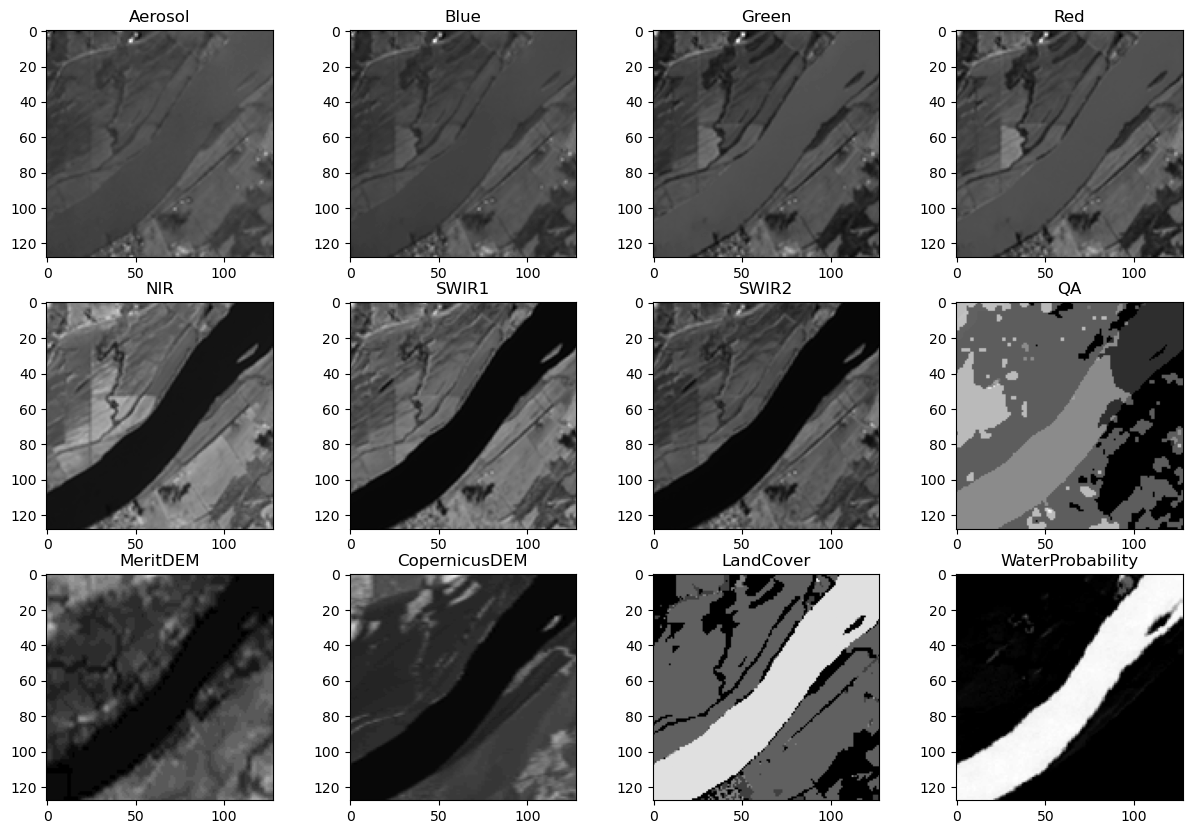

In [ ]:
# Visualize all bands on a grey scale
num_bands = im_array.shape[2]
num_rows = 3
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_bands):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].imshow(im_array[:, :, i], cmap='gray')
    axs[row_idx, col_idx].set_title(list(band_names.values())[i])

plt.show()

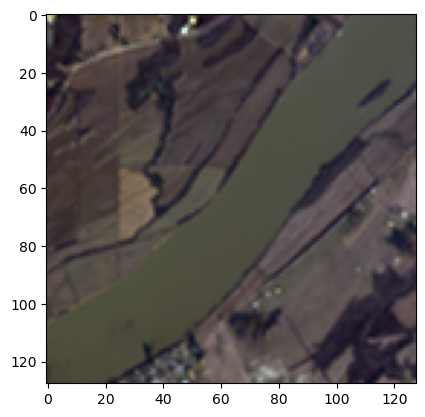

In [ ]:
rgb_array = im_array[:,:,[3,2,1]]
normalized_rgb_array = ((rgb_array - rgb_array.min(axis=(0, 1))) / (rgb_array.ptp(axis=(0, 1))) * 255).astype(np.uint8)


pl.figure()
pl.imshow(normalized_rgb_array)
pl.show()

In [ ]:
band_stats = []

# Iterate through bands and store statistics
for i in range(im_array.shape[2]):
    band_name = list(band_names.values())[i]
    band_data = im_array[:, :, i]

    stats = {
        "Band": band_name,
        "Minimum": np.min(band_data),
        "Maximum": np.max(band_data),
        "Mean": np.mean(band_data),
        "Median": np.median(band_data),
        "Std Deviation": np.std(band_data),
    }

    band_stats.append(stats)

table = tabulate(band_stats, headers="keys", tablefmt="pretty")
print(table)


+------------------+---------+---------+--------------------+--------+--------------------+
|       Band       | Minimum | Maximum |        Mean        | Median |   Std Deviation    |
+------------------+---------+---------+--------------------+--------+--------------------+
|     Aerosol      |  -224   |  1799   |  379.47998046875   | 365.0  | 111.53230055455597 |
|       Blue       |   -80   |  2033   | 484.74542236328125 | 473.0  | 123.0248678625186  |
|      Green       |   156   |  2323   | 754.4349975585938  | 801.0  | 167.6512480273031  |
|       Red        |   128   |  2830   | 939.8635864257812  | 964.0  | 215.53545951610198 |
|       NIR        |   -83   |  4559   | 1452.0944213867188 | 1612.0 | 850.5557771608236  |
|      SWIR1       |  -119   |  4745   | 1261.9317626953125 | 1481.0 | 855.1493360491095  |
|      SWIR2       |   -76   |  3820   | 794.8787841796875  | 912.0  | 550.3057423936374  |
|        QA        |   64    |   240   | 126.3956298828125  | 128.0  | 37.164836

In [ ]:
band_histograms = [np.histogram(im_array[:, :, i], bins=256, range=(0, 256))[0] for i in range(im_array.shape[2])]

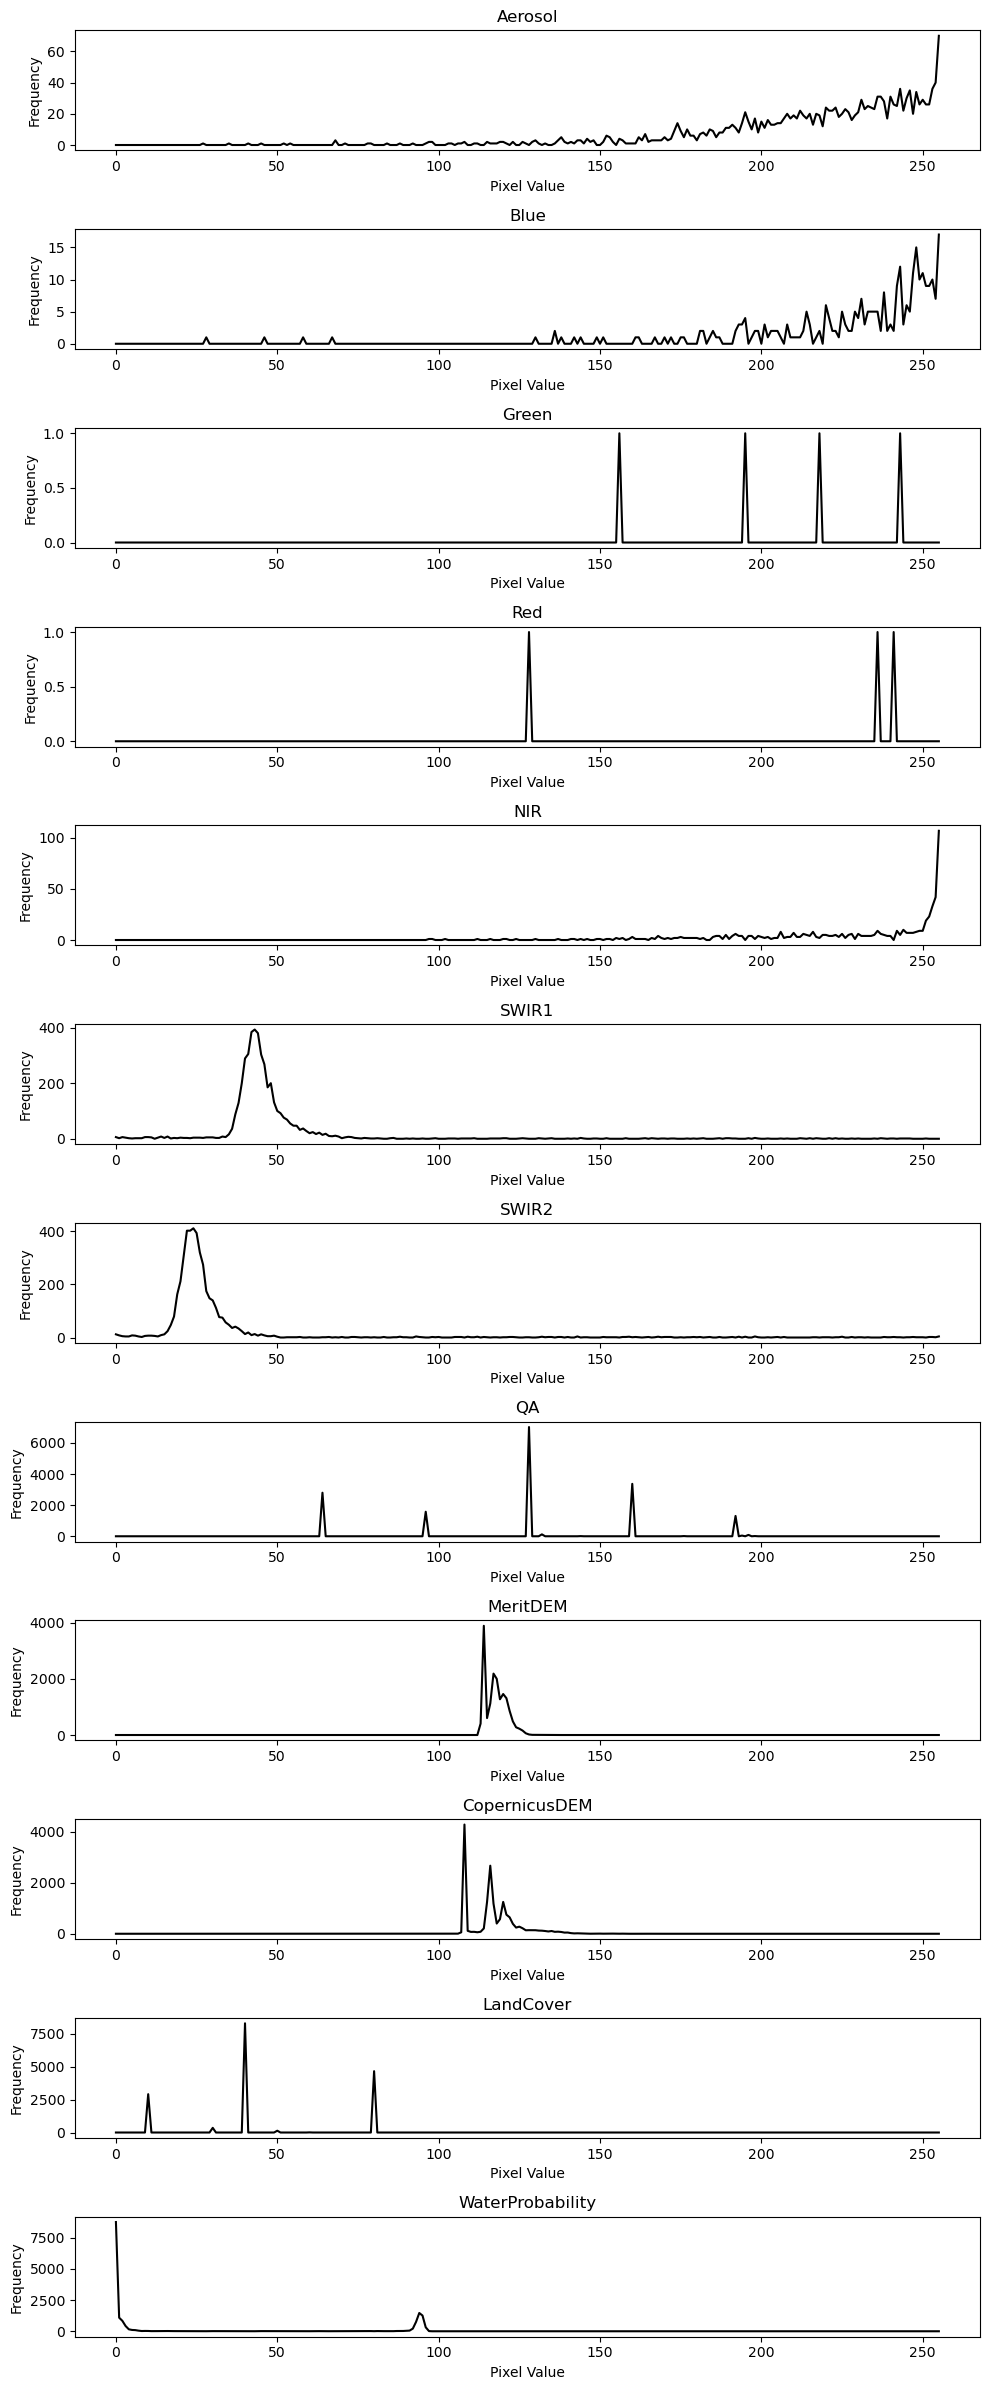

In [ ]:
import matplotlib.pyplot as plt

num_bands = len(band_histograms)

fig, axs = plt.subplots(num_bands, figsize=(10, 2 * num_bands))

for i in range(num_bands):
    axs[i].plot(band_histograms[i], color='black')
    axs[i].set_title(list(band_names.values())[i])
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Let's see statistics on each of the images

In [ ]:
# Let's see statistics on each of the images

# Directory of all samples
directory_path = "data/train/images/"

tif_files = [file for file in os.listdir(directory_path) if file.endswith(".tif")]

all_band_stats = []

for file_name in tif_files:
    file_path = os.path.join(directory_path, file_name)

    im = tifffile.imread(file_path)
    im_array = np.array(im)

    band_stats = []

    # Iterate over bands and store statistics
    for i in range(im_array.shape[2]):
        band_name = f"{file_name[:-4]} {list(band_names.values())[i]}"
        band_data = im_array[:, :, i]

        stats = {
            "Band": band_name,
            "Minimum": np.min(band_data),
            "Maximum": np.max(band_data),
            "Mean": np.mean(band_data),
            "Median": np.median(band_data),
            "Std Deviation": np.std(band_data),
        }

        band_stats.append(stats)

    all_band_stats.extend(band_stats)

# Display the overall statistics in a tabular format
table = tabulate(all_band_stats, headers="keys", tablefmt="pretty")
print(table)



+----------------------+---------+---------+--------------------+---------+---------------------+
|         Band         | Minimum | Maximum |        Mean        | Median  |    Std Deviation    |
+----------------------+---------+---------+--------------------+---------+---------------------+
|      0 Aerosol       |   14    |   532   | 174.0609130859375  |  167.0  |  67.17490761753295  |
|        0 Blue        |   -28   |   846   |  166.073486328125  |  157.0  |  85.8864946373276   |
|       0 Green        |   -2    |  1099   | 326.94390869140625 |  326.0  | 117.95013239164467  |
|        0 Red         |    2    |  1297   | 325.7662353515625  |  313.0  | 143.17094792476257  |
|        0 NIR         |   46    |  4975   | 1945.2276000976562 | 1998.0  |  648.4528072496362  |
|       0 SWIR1        |   30    |  3786   | 1298.1792602539062 | 1299.0  |  548.2851897719661  |
|       0 SWIR2        |   16    |  3004   | 678.8449096679688  |  635.0  |  351.2854379534972  |
|         0 QA      

In [ ]:
import os
import numpy as np
from skimage import io

dataset_folder = "../dataset/train/images"
image_files = [filename for filename in os.listdir(dataset_folder) if filename.endswith('.tif')]

# Initialize lists to store pixel values for each band
number_of_bands = 12
band_pixels = [[] for _ in range(number_of_bands)]

for image_file in image_files:
    image_path = os.path.join(dataset_folder, image_file)

    image = io.imread(image_path)

    for band_index in range(number_of_bands):
        # Extract the pixel
        band_values = image[:, :, band_index].ravel()

        # Append the pixel values to the list for the current band
        band_pixels[band_index].extend(band_values)

# Calculate mean and standard deviation
band_means = [np.mean(band) for band in band_pixels]
band_stds = [np.std(band) for band in band_pixels]

for band_index, (mean, std) in enumerate(zip(band_means, band_stds)):
    print(f'Band {band_index + 1}: Mean={mean}, Std={std}')


Band 1: Mean=396.4676729090074, Std=270.0665930690001
Band 2: Mean=494.62102872561786, Std=325.9791968534611
Band 3: Mean=822.3197845259523, Std=418.1216302140401
Band 4: Mean=973.6749612646165, Std=586.702975158907
Band 5: Mean=2090.1109964208667, Std=1055.984607199742
Band 6: Mean=1964.050569023182, Std=1191.422265608708
Band 7: Mean=1351.2739533069087, Std=961.7625875864022
Band 8: Mean=102.73963040619894, Std=48.80401526687055
Band 9: Mean=141.80390640956904, Std=1364.9811211468618
Band 10: Mean=300.74136252808415, Std=496.03880722606107
Band 11: Mean=35.10253307866115, Std=20.184524568480853
Band 12: Mean=9.753326416015625, Std=27.75830661807713


In [ ]:
# Calculate additional metrics
band_min = [np.min(band) for band in band_pixels]
band_max = [np.max(band) for band in band_pixels]
band_median = [np.median(band) for band in band_pixels]

# Create a table
table_headers = ["Band", "Minimum", "Maximum", "Mean", "Median", "Std Deviation"]
table_data = []

for band_index, (mean, std, minimum, maximum, median) in enumerate(zip(band_means, band_stds, band_min, band_max, band_median)):
    table_data.append([band_index + 1, minimum, maximum, mean, median, std])

# Print the table
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤═══════════╤═══════════╤════════════╤══════════╤═════════════════╕
│   Band │   Minimum │   Maximum │       Mean │   Median │   Std Deviation │
╞════════╪═══════════╪═══════════╪════════════╪══════════╪═════════════════╡
│      1 │     -1393 │      6568 │  396.468   │      363 │        270.067  │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┤
│      2 │     -1169 │      9659 │  494.621   │      458 │        325.979  │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┤
│      3 │      -722 │     11368 │  822.32    │      775 │        418.122  │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┤
│      4 │      -684 │     12041 │  973.675   │      904 │        586.703  │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┤
│      5 │      -412 │     15841 │ 2090.11    │     2164 │       1055.98   │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┤

In [ ]:
# Define percentage ranges
percentage_ranges = [25, 50, 75]

# Calculate percentage values within each range
percentage_values = [[np.percentile(band, percentage) for percentage in percentage_ranges] for band in band_pixels]

# Create a table
table_headers = ["Band", "Minimum", "Maximum", "Mean", "Median", "Std Deviation"]
table_headers.extend([f"{percentage}% Percentile" for percentage in percentage_ranges])
table_data = []

for band_index, (mean, std, minimum, maximum, median, percentiles) in enumerate(
    zip(band_means, band_stds, band_min, band_max, band_median, percentage_values)
):
    row_data = [band_index + 1, minimum, maximum, mean, median, std]
    row_data.extend(percentiles)
    table_data.append(row_data)

# Print the table
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤═══════════╤═══════════╤════════════╤══════════╤═════════════════╤══════════════════╤══════════════════╤══════════════════╕
│   Band │   Minimum │   Maximum │       Mean │   Median │   Std Deviation │   25% Percentile │   50% Percentile │   75% Percentile │
╞════════╪═══════════╪═══════════╪════════════╪══════════╪═════════════════╪══════════════════╪══════════════════╪══════════════════╡
│      1 │     -1393 │      6568 │  396.468   │      363 │        270.067  │              256 │              363 │              480 │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┼──────────────────┼──────────────────┼──────────────────┤
│      2 │     -1169 │      9659 │  494.621   │      458 │        325.979  │              318 │              458 │              600 │
├────────┼───────────┼───────────┼────────────┼──────────┼─────────────────┼──────────────────┼──────────────────┼──────────────────┤
│      3 │      -722 │     11368 │  822.32    │      775 │    

In [ ]:
from scipy import stats

skewness = [stats.skew(band) for band in band_pixels]
kurtosis = [stats.kurtosis(band) for band in band_pixels]
quantiles = [np.percentile(band, [10, 25, 50, 75, 90]) for band in band_pixels]
data_range = [np.ptp(band) for band in band_pixels]
iqr = [stats.iqr(band) for band in band_pixels]
cv = [np.std(band) / np.mean(band) for band in band_pixels]

# Create a table
table_headers = ["Band", "Minimum", "Maximum", "Mean", "Median", "Std Deviation"]
table_headers.extend([f"{percentage}% Percentile" for percentage in percentage_ranges])
table_headers.extend(["Skewness", "Kurtosis", "10th", "25th", "75th", "90th", "Range", "IQR", "Coefficient of Variation"])
table_data = []

for band_index, (
    mean, std, minimum, maximum, median, percentiles, skew, kurt, quantile_vals, range_val, iqr_val, cv_val
) in enumerate(
    zip(band_means, band_stds, band_min, band_max, band_median, percentage_values, skewness, kurtosis, quantiles,
        data_range, iqr, cv)
):
    row_data = [band_index + 1, minimum, maximum, mean, median, std]
    row_data.extend(percentiles)
    row_data.extend([skew, kurt])
    row_data.extend(quantile_vals)
    row_data.extend([range_val, iqr_val, cv_val])
    table_data.append(row_data)

# Print the table
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)


╒════╤════════╤═══════════╤════════════╤════════╤═══════════╤═════════════════╤══════════════════╤══════════════════╤══════════════════╤════════════╤════════════╤════════╤════════╤════════╤════════╤═════════╤═══════╤════════════════════════════╕
│    │   Band │   Minimum │    Maximum │   Mean │    Median │   Std Deviation │   25% Percentile │   50% Percentile │   75% Percentile │   Skewness │   Kurtosis │   10th │   25th │   75th │   90th │   Range │   IQR │   Coefficient of Variation │
╞════╪════════╪═══════════╪════════════╪════════╪═══════════╪═════════════════╪══════════════════╪══════════════════╪══════════════════╪════════════╪════════════╪════════╪════════╪════════╪════════╪═════════╪═══════╪════════════════════════════╡
│  1 │  -1393 │      6568 │  396.468   │    363 │  270.067  │             256 │              363 │              480 │         6.80213  │ 94.7507    │        175 │    256 │    363 │    480 │    628 │    7961 │   224 │                   0.681182 │
├────┼────────┼─

In [ ]:
for band in band_pixels:
    print(len(band))

5013504
5013504
5013504
5013504
5013504
5013504
5013504
5013504
5013504
5013504
5013504
5013504


In [ ]:
mean_list = []
std_list = []
maximum_list = []
for band_index, (mean, std, minimum, maximum, median, percentiles) in enumerate(
    zip(band_means, band_stds, band_min, band_max, band_median, percentage_values)):
    mean_list.append(mean)
    std_list.append(std)
    maximum_list.append(maximum)
print(mean_list, "\n", std_list, "\n", maximum_list)

[396.4676729090074, 494.62102872561786, 822.3197845259523, 973.6749612646165, 2090.1109964208667, 1964.050569023182, 1351.2739533069087, 102.73963040619894, 141.80390640956904, 300.74136252808415, 35.10253307866115, 9.753326416015625] 
 [270.0665930690001, 325.9791968534611, 418.1216302140401, 586.702975158907, 1055.984607199742, 1191.422265608708, 961.7625875864022, 48.80401526687055, 1364.9811211468618, 496.03880722606107, 20.184524568480853, 27.75830661807713] 
 [6568, 9659, 11368, 12041, 15841, 15252, 14647, 255, 4245, 4287, 100, 111]


## Feature importance

In [ ]:
import os
import re
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import tifffile
from PIL import Image

# Main dataset directory
dataset_dir = "/content/drive/MyDrive/opti-flood/Dataset_full"

# Subdirectories for images and masks
image_subdir = 'train/images'
mask_subdir = 'train/labels'

# Get a list of all image files in the directory
image_files = [file for file in os.listdir(os.path.join(dataset_dir, image_subdir)) if file.endswith('.tif')]
mask_files = [file for file in os.listdir(os.path.join(dataset_dir, mask_subdir)) if file.endswith('.png')]

# Sort both lists based on the numerical part of the filenames
image_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))
mask_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

all_feature_importance = []

for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(dataset_dir, image_subdir, image_file)
    image_data = tifffile.imread(image_path)

    mask_path = os.path.join(dataset_dir, mask_subdir, mask_file)
    mask_data = np.array(Image.open(mask_path))

    X_train = image_data.reshape(-1, image_data.shape[2])
    y_train = mask_data.ravel()

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    feature_importance = clf.feature_importances_
    print(f"Feature Importance for {image_file}:", feature_importance)

    all_feature_importance.append(feature_importance)

avg_feature_importance = np.mean(all_feature_importance, axis=0)
print("Average Feature Importance Across All Images:", avg_feature_importance)

Feature Importance for 0.tif: [0.02587898 0.02234175 0.05681815 0.02568652 0.17603201 0.0625593
 0.07272251 0.09179845 0.02861332 0.02930462 0.19624078 0.21200361]
Feature Importance for 1.tif: [0.05185096 0.04222043 0.05976376 0.04528088 0.20601552 0.1487574
 0.08918978 0.02687493 0.07187818 0.09112532 0.14874252 0.01830033]
Feature Importance for 2.tif: [0.06024923 0.04825096 0.05110489 0.04614405 0.17468311 0.15531285
 0.19525732 0.06988405 0.05064099 0.07344685 0.01117418 0.06385153]
Feature Importance for 3.tif: [0.06019936 0.05458211 0.05872761 0.06646111 0.08915037 0.06954815
 0.06519778 0.01561594 0.2344655  0.22481593 0.05329848 0.00793768]
Feature Importance for 4.tif: [0.05435848 0.06198686 0.07170119 0.12155361 0.12796005 0.13251005
 0.07869776 0.02145933 0.08493512 0.22621613 0.00875307 0.00986835]
Feature Importance for 5.tif: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature Importance for 6.tif: [0.05575844 0.06537131 0.05802012 0.05666952 0.2091199  0.21542646
 0.12581841 

# Classes percentage

In [ ]:
import os
import re
import numpy as np
from PIL import Image

dataset_dir = "/content/drive/MyDrive/opti-flood/Dataset_full"

mask_subdir = 'train/labels'

mask_files = [file for file in os.listdir(os.path.join(dataset_dir, mask_subdir)) if file.endswith('.png')]

mask_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

total_pixels = 0
class_0_pixels = 0
class_1_pixels = 0

for mask_file in mask_files:
    mask_path = os.path.join(dataset_dir, mask_subdir, mask_file)
    mask_data = np.array(Image.open(mask_path))

    total_pixels += mask_data.size
    class_0_pixels += np.sum(mask_data == 0)
    class_1_pixels += np.sum(mask_data == 1)

percentage_class_0 = (class_0_pixels / total_pixels) * 100
percentage_class_1 = (class_1_pixels / total_pixels) * 100

print(f"Percentage of pixels labeled as class 0: {percentage_class_0:.2f}%")
print(f"Percentage of pixels labeled as class 1: {percentage_class_1:.2f}%")


Percentage of pixels labeled as class 0: 74.02%
Percentage of pixels labeled as class 1: 25.98%


## Land use importance

In [ ]:
import os
import re
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import tifffile
from PIL import Image

# Main dataset directory
dataset_dir = "/content/drive/MyDrive/opti-flood/Dataset_full"

# Subdirectories for images and masks
image_subdir = 'train/images'
mask_subdir = 'train/labels'

image_files = [file for file in os.listdir(os.path.join(dataset_dir, image_subdir)) if file.endswith('.tif')]
mask_files = [file for file in os.listdir(os.path.join(dataset_dir, mask_subdir)) if file.endswith('.png')]

image_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))
mask_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Initialize variables to store features and labels
features = []
labels = []

# Iterate over each image file
for image_file, mask_file in zip(image_files, mask_files):
    # Load multiband image using tifffile
    image_path = os.path.join(dataset_dir, image_subdir, image_file)
    image_data = tifffile.imread(image_path)

    # Extract band 10 information and flatten
    band_10 = image_data[:, :, 10].flatten()

    # Load binary mask using PIL for PNG images
    mask_path = os.path.join(dataset_dir, mask_subdir, mask_file)
    mask_data = np.array(Image.open(mask_path)).flatten()

    # Append features and labels
    features.append(band_10)
    labels.append(mask_data)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [ ]:
value_counts = {}

for i in range(features.shape[0]):
    for j in range(features.shape[1]):
        key = features[i, j]
        label = labels[i, j]

        if key not in value_counts:
            value_counts[key] = {'0': 0, '1': 0}

        value_counts[key][str(label)] += 1

print(value_counts)

{80: {'0': 2873, '1': 532196}, 30: {'0': 1090230, '1': 38061}, 10: {'0': 966401, '1': 225283}, 90: {'0': 8165, '1': 2057}, 40: {'0': 1346696, '1': 492851}, 50: {'0': 113625, '1': 9446}, 60: {'0': 68183, '1': 2198}, 20: {'0': 112189, '1': 133}, 70: {'0': 27, '1': 0}, 100: {'0': 2843, '1': 47}}


In [ ]:
import pprint
class_mapping = {
    10: 'Tree cover',
    20: 'Shrubland',
    30: 'Grassland',
    40: 'Cropland',
    50: 'Built-up',
    60: 'Baresoil/parse vegetation',
    70: 'Snow and Ice',
    80: 'Permanent water bodies',
    90: 'Wetland',
    100: 'Moss and lichen'
}
pprint.pprint(class_mapping)
pprint.pprint(value_counts)

{10: 'Tree cover',
 20: 'Shrubland',
 30: 'Grassland',
 40: 'Cropland',
 50: 'Built-up',
 60: 'Baresoil/parse vegetation',
 70: 'Snow and Ice',
 80: 'Permanent water bodies',
 90: 'Wetland',
 100: 'Moss and lichen'}
{10: {'0': 966401, '1': 225283},
 20: {'0': 112189, '1': 133},
 30: {'0': 1090230, '1': 38061},
 40: {'0': 1346696, '1': 492851},
 50: {'0': 113625, '1': 9446},
 60: {'0': 68183, '1': 2198},
 70: {'0': 27, '1': 0},
 80: {'0': 2873, '1': 532196},
 90: {'0': 8165, '1': 2057},
 100: {'0': 2843, '1': 47}}


In [ ]:
# Calculate feature importance based on the ratio of flooded to not flooded instances
feature_importance = {}

for key, counts in value_counts.items():
    not_flooded_count = counts['0']
    flooded_count = counts['1']

    if not_flooded_count == 0:
        feature_importance[key] = flooded_count
    else:
        feature_importance[key] = flooded_count / not_flooded_count

sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

pprint.pprint(sorted_feature_importance)

{10: 0.23311544586563962,
 20: 0.0011854994696449742,
 30: 0.034910982086348755,
 40: 0.3659704937120182,
 50: 0.08313311331133114,
 60: 0.03223677456257425,
 70: 0.0,
 80: 185.24051514096763,
 90: 0.25192896509491736,
 100: 0.016531832571227575}


In [ ]:
pprint.pprint(value_counts)
pprint.pprint(sorted_feature_importance)
pprint.pprint(class_mapping)

{10: {'0': 966401, '1': 225283},
 20: {'0': 112189, '1': 133},
 30: {'0': 1090230, '1': 38061},
 40: {'0': 1346696, '1': 492851},
 50: {'0': 113625, '1': 9446},
 60: {'0': 68183, '1': 2198},
 70: {'0': 27, '1': 0},
 80: {'0': 2873, '1': 532196},
 90: {'0': 8165, '1': 2057},
 100: {'0': 2843, '1': 47}}
{10: 0.23311544586563962,
 20: 0.0011854994696449742,
 30: 0.034910982086348755,
 40: 0.3659704937120182,
 50: 0.08313311331133114,
 60: 0.03223677456257425,
 70: 0.0,
 80: 185.24051514096763,
 90: 0.25192896509491736,
 100: 0.016531832571227575}
{10: 'Tree cover',
 20: 'Shrubland',
 30: 'Grassland',
 40: 'Cropland',
 50: 'Built-up',
 60: 'Baresoil/parse vegetation',
 70: 'Snow and Ice',
 80: 'Permanent water bodies',
 90: 'Wetland',
 100: 'Moss and lichen'}


# QA band

In [ ]:


# Main dataset directory
dataset_dir = "/content/drive/MyDrive/opti-flood/Dataset_full"

image_subdir = 'train/images'
mask_subdir = 'train/labels'

image_files = [file for file in os.listdir(os.path.join(dataset_dir, image_subdir)) if file.endswith('.tif')]
mask_files = [file for file in os.listdir(os.path.join(dataset_dir, mask_subdir)) if file.endswith('.png')]

image_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))
mask_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Initialize variables to store features and labels
features = []
labels = []

for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(dataset_dir, image_subdir, image_file)
    image_data = tifffile.imread(image_path)

    band_10 = image_data[:, :, 7].flatten()

    mask_path = os.path.join(dataset_dir, mask_subdir, mask_file)
    mask_data = np.array(Image.open(mask_path)).flatten()

    features.append(band_10)
    labels.append(mask_data)

features = np.array(features)
labels = np.array(labels)

In [ ]:
value_counts = {}

for i in range(features.shape[0]):
    for j in range(features.shape[1]):
        key = features[i, j]
        label = labels[i, j]

        if key not in value_counts:
            value_counts[key] = {'0': 0, '1': 0}

        value_counts[key][str(label)] += 1

print(value_counts)

{64: {'0': 2317133, '1': 222686}, 96: {'0': 37725, '1': 511362}, 160: {'0': 19801, '1': 188261}, 128: {'0': 867288, '1': 107019}, 192: {'0': 378148, '1': 52169}, 112: {'0': 1141, '1': 5775}, 80: {'0': 22994, '1': 8813}, 224: {'0': 13870, '1': 177152}, 176: {'0': 1135, '1': 6361}, 144: {'0': 5853, '1': 5202}, 208: {'0': 5781, '1': 6778}, 68: {'0': 11244, '1': 495}, 76: {'0': 564, '1': 16}, 72: {'0': 2436, '1': 29}, 136: {'0': 784, '1': 54}, 200: {'0': 920, '1': 9}, 198: {'0': 581, '1': 41}, 194: {'0': 2007, '1': 149}, 130: {'0': 1244, '1': 83}, 196: {'0': 7339, '1': 385}, 132: {'0': 5465, '1': 986}, 140: {'0': 173, '1': 25}, 204: {'0': 322, '1': 16}, 134: {'0': 483, '1': 46}, 70: {'0': 414, '1': 15}, 240: {'0': 3370, '1': 7926}, 164: {'0': 9, '1': 83}, 255: {'0': 0, '1': 62}, 84: {'0': 61, '1': 26}, 66: {'0': 2809, '1': 185}, 100: {'0': 17, '1': 23}, 138: {'0': 22, '1': 0}, 202: {'0': 30, '1': 0}, 142: {'0': 4, '1': 0}, 74: {'0': 51, '1': 0}, 78: {'0': 9, '1': 0}, 206: {'0': 2, '1': 0},

In [ ]:
import pprint

pprint.pprint(value_counts)

{64: {'0': 2317133, '1': 222686},
 66: {'0': 2809, '1': 185},
 68: {'0': 11244, '1': 495},
 70: {'0': 414, '1': 15},
 72: {'0': 2436, '1': 29},
 74: {'0': 51, '1': 0},
 76: {'0': 564, '1': 16},
 78: {'0': 9, '1': 0},
 80: {'0': 22994, '1': 8813},
 84: {'0': 61, '1': 26},
 96: {'0': 37725, '1': 511362},
 100: {'0': 17, '1': 23},
 112: {'0': 1141, '1': 5775},
 116: {'0': 0, '1': 3},
 128: {'0': 867288, '1': 107019},
 130: {'0': 1244, '1': 83},
 132: {'0': 5465, '1': 986},
 134: {'0': 483, '1': 46},
 136: {'0': 784, '1': 54},
 138: {'0': 22, '1': 0},
 140: {'0': 173, '1': 25},
 142: {'0': 4, '1': 0},
 144: {'0': 5853, '1': 5202},
 148: {'0': 1, '1': 3},
 160: {'0': 19801, '1': 188261},
 164: {'0': 9, '1': 83},
 176: {'0': 1135, '1': 6361},
 192: {'0': 378148, '1': 52169},
 194: {'0': 2007, '1': 149},
 196: {'0': 7339, '1': 385},
 198: {'0': 581, '1': 41},
 200: {'0': 920, '1': 9},
 202: {'0': 30, '1': 0},
 204: {'0': 322, '1': 16},
 206: {'0': 2, '1': 0},
 208: {'0': 5781, '1': 6778},
 22

In [ ]:
new_dict = {}

for key, counts in value_counts.items():
    count_0 = counts['0']
    count_1 = counts['1']

    # Choose the value based on which count is greater
    new_value = '0' if count_0 >= count_1 else '1'

    # Add the key and new value to the new dictionary
    new_dict[key] = new_value

pprint.pprint(new_dict)

{64: '0',
 66: '0',
 68: '0',
 70: '0',
 72: '0',
 74: '0',
 76: '0',
 78: '0',
 80: '0',
 84: '0',
 96: '1',
 100: '1',
 112: '1',
 116: '1',
 128: '0',
 130: '0',
 132: '0',
 134: '0',
 136: '0',
 138: '0',
 140: '0',
 142: '0',
 144: '0',
 148: '1',
 160: '1',
 164: '1',
 176: '1',
 192: '0',
 194: '0',
 196: '0',
 198: '0',
 200: '0',
 202: '0',
 204: '0',
 206: '0',
 208: '1',
 224: '1',
 228: '1',
 240: '1',
 244: '1',
 255: '1'}


In [ ]:
data = {64: {'0': 2317133, '1': 222686},
 66: {'0': 2809, '1': 185},
 68: {'0': 11244, '1': 495},
 70: {'0': 414, '1': 15},
 72: {'0': 2436, '1': 29},
 74: {'0': 51, '1': 0},
 76: {'0': 564, '1': 16},
 78: {'0': 9, '1': 0},
 80: {'0': 22994, '1': 8813},
 84: {'0': 61, '1': 26},
 96: {'0': 37725, '1': 511362},
 100: {'0': 17, '1': 23},
 112: {'0': 1141, '1': 5775},
 116: {'0': 0, '1': 3},
 128: {'0': 867288, '1': 107019},
 130: {'0': 1244, '1': 83},
 132: {'0': 5465, '1': 986},
 134: {'0': 483, '1': 46},
 136: {'0': 784, '1': 54},
 138: {'0': 22, '1': 0},
 140: {'0': 173, '1': 25},
 142: {'0': 4, '1': 0},
 144: {'0': 5853, '1': 5202},
 148: {'0': 1, '1': 3},
 160: {'0': 19801, '1': 188261},
 164: {'0': 9, '1': 83},
 176: {'0': 1135, '1': 6361},
 192: {'0': 378148, '1': 52169},
 194: {'0': 2007, '1': 149},
 196: {'0': 7339, '1': 385},
 198: {'0': 581, '1': 41},
 200: {'0': 920, '1': 9},
 202: {'0': 30, '1': 0},
 204: {'0': 322, '1': 16},
 206: {'0': 2, '1': 0},
 208: {'0': 5781, '1': 6778},
 224: {'0': 13870, '1': 177152},
 228: {'0': 2, '1': 31},
 240: {'0': 3370, '1': 7926},
 244: {'0': 0, '1': 3},
 255: {'0': 0, '1': 62}}

In [ ]:
import pprint

percentages = {key: (value['1'] / (value['0'] + value['1'])) * 100 if (value['0'] + value['1']) > 0 else 0 for key, value in data.items()}

sorted_keys = sorted(percentages, key=percentages.get, reverse=True)

# Normalize the dataset based on the ordered keys
normalized_data = {key: data[key] for key in sorted_keys}


# Print the normalized dataset
print(percentages)

{64: 8.767790145675736, 66: 6.179024716098865, 68: 4.2167135190391, 70: 3.4965034965034967, 72: 1.1764705882352942, 74: 0.0, 76: 2.7586206896551726, 78: 0.0, 80: 27.70773729053353, 84: 29.88505747126437, 96: 93.1295040676614, 100: 57.49999999999999, 112: 83.50202429149797, 116: 100.0, 128: 10.984114863179675, 130: 6.2547098718914835, 132: 15.28445202294218, 134: 8.695652173913043, 136: 6.443914081145586, 138: 0.0, 140: 12.626262626262626, 142: 0.0, 144: 47.05563093622795, 148: 75.0, 160: 90.4831252222895, 164: 90.21739130434783, 176: 84.85859124866596, 192: 12.123388106907234, 194: 6.910946196660482, 196: 4.984464008285863, 198: 6.591639871382636, 200: 0.9687836383207751, 202: 0.0, 204: 4.733727810650888, 206: 0.0, 208: 53.969265068874904, 224: 92.73905623436043, 228: 93.93939393939394, 240: 70.16643059490086, 244: 100.0, 255: 100.0}


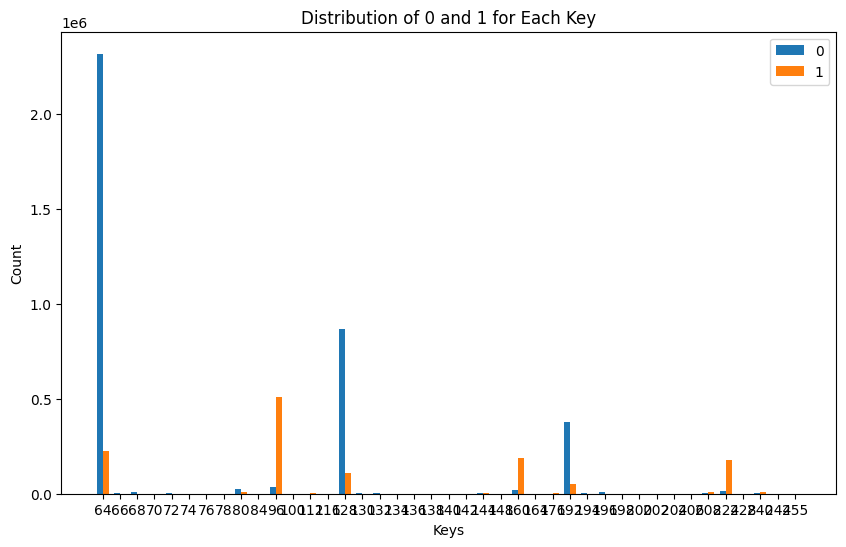

In [ ]:
import matplotlib.pyplot as plt

keys = list(data.keys())
values_0 = [entry['0'] for entry in data.values()]
values_1 = [entry['1'] for entry in data.values()]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_0 = [i - bar_width/2 for i in range(len(keys))]
bar_positions_1 = [i + bar_width/2 for i in range(len(keys))]

plt.bar(bar_positions_0, values_0, width=bar_width, label='0')
plt.bar(bar_positions_1, values_1, width=bar_width, label='1')

plt.xlabel('Keys')
plt.ylabel('Count')
plt.title('Distribution of 0 and 1 for Each Key')
plt.xticks(range(len(keys)), keys)
plt.legend()

plt.show()

<ipython-input-5-6d6c8bf90a04>:11: RuntimeWarning: divide by zero encountered in log
  plt.bar(bar_positions_0, np.log(values_0), width=bar_width, label='0')
<ipython-input-5-6d6c8bf90a04>:12: RuntimeWarning: divide by zero encountered in log
  plt.bar(bar_positions_1, np.log(values_1), width=bar_width, label='1')


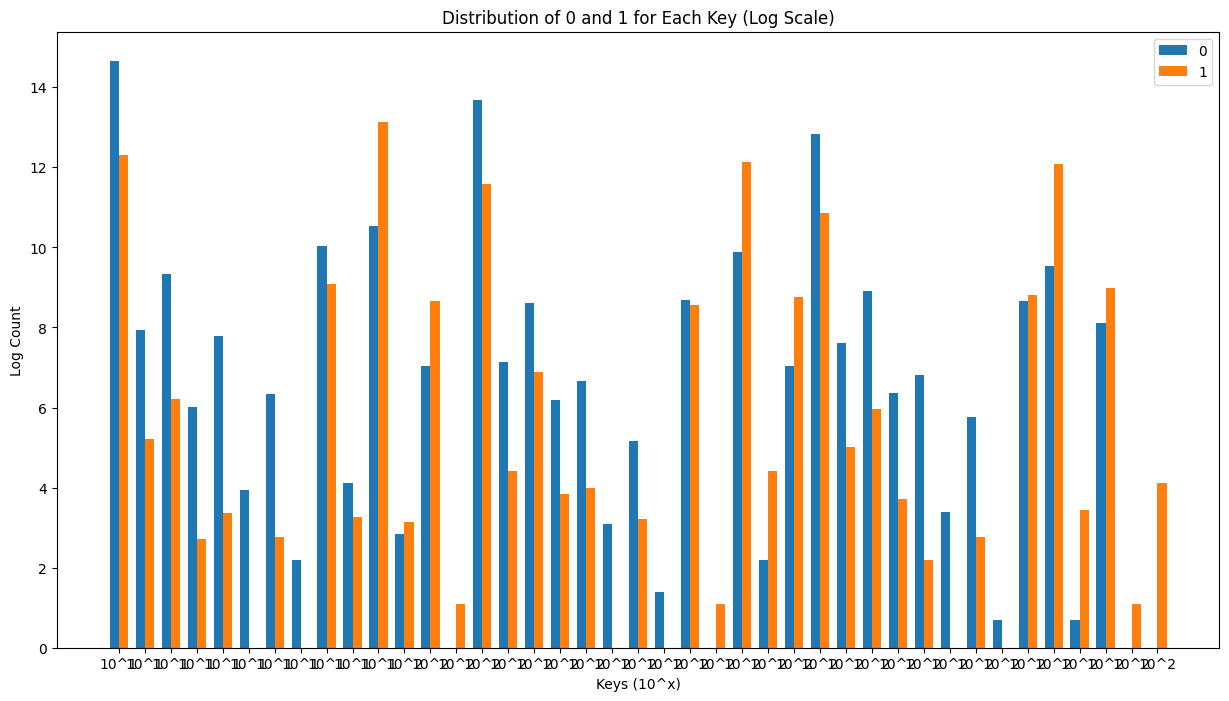

In [ ]:
keys = list(data.keys())
values_0 = [entry['0'] for entry in data.values()]
values_1 = [entry['1'] for entry in data.values()]

fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.35
bar_positions_0 = [i - bar_width/2 for i in range(len(keys))]
bar_positions_1 = [i + bar_width/2 for i in range(len(keys))]

plt.bar(bar_positions_0, np.log(values_0), width=bar_width, label='0')
plt.bar(bar_positions_1, np.log(values_1), width=bar_width, label='1')

plt.xlabel('Keys (10^x)')
plt.ylabel('Log Count')
plt.title('Distribution of 0 and 1 for Each Key (Log Scale)')
plt.xticks(range(len(keys)), [f'10^{int(np.log10(key))}' for key in keys])
plt.legend()

plt.show()

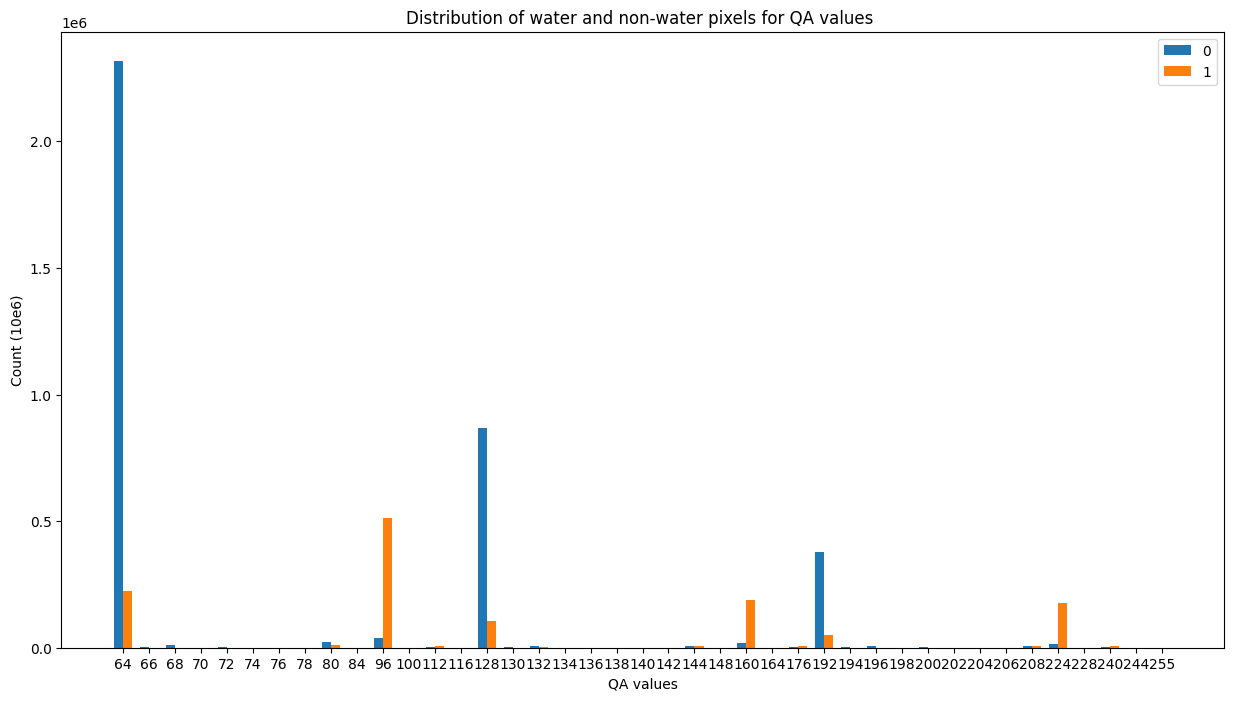

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

keys = list(data.keys())
values_0 = [entry['0'] for entry in data.values()]
values_1 = [entry['1'] for entry in data.values()]

fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.35
bar_positions_0 = np.arange(len(keys))
bar_positions_1 = bar_positions_0 + bar_width

plt.bar(bar_positions_0, values_0, width=bar_width, label='0')
plt.bar(bar_positions_1, values_1, width=bar_width, label='1')

plt.xlabel('QA values')
plt.ylabel('Count (1e6)')
plt.title('Distribution of water and non-water pixels for QA values ')
plt.xticks(bar_positions_0 + bar_width / 2, keys)
plt.legend()

plt.show()
